In [3]:
import cv2

import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
 
import sys
import numpy as np
import glob
class shuangmu:
    def __init__(self):
        self.m1 = 0
        self.m2 = 0
        self.d1 = 0
        self.d2 = 0
        self.R = 0
        self.T = 0
stereo = shuangmu()

class StereoCalibration(object):
    def __init__(self):
        self.imagesL = self.read_images('imagenew2/camL')
        self.imagesR = self.read_images('imagenew/camR')
        
    def read_images(self , cal_path):
        filepath = glob.glob(cal_path + '/*.jpg')
        filepath.sort()
        return filepath
    #标定图像
    def calibration_photo(self):
        #设置要标定的角点个数
        x_nums = 9                                                   #x方向上的角点个数
        y_nums = 6
        # 设置(生成)标定图在世界坐标中的坐标
        world_point = np.zeros((x_nums * y_nums,3),np.float32)            #生成x_nums*y_nums个坐标，每个坐标包含x,y,z三个元素
        world_point[:,:2] = np.mgrid[:x_nums,:y_nums].T.reshape(-1, 2)    #mgrid[]生成包含两个二维矩阵的矩阵，每个矩阵都有x_nums列,y_nums行
                                                                            #.T矩阵的转置
                                                                            #reshape()重新规划矩阵，但不改变矩阵元素
        #保存角点坐标
        world_position = []
        image_positionl = []
        image_positionr = []
        #设置角点查找限制
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,30,0.001)
        #获取所有标定图
        for ii in range(40):

            image_path_l = self.imagesL[ii]
            image_path_r = self.imagesR[ii]

            image_l = cv2.imread(image_path_l)
            image_r = cv2.imread(image_path_r)
            gray_l = cv2.cvtColor(image_l,cv2.COLOR_RGB2GRAY)
            gray_r = cv2.cvtColor(image_r,cv2.COLOR_RGB2GRAY)

            #查找角点
    #         ok,corners = cv2.findChessboardCorners(gray,(x_nums,y_nums),None)
            ok1,cornersl = cv2.findChessboardCorners(gray_l,(x_nums,y_nums),None)
            ok2,cornersr = cv2.findChessboardCorners(gray_r,(x_nums,y_nums),None)
#             ok1,cornersl = cv2.findCirclesGrid(gray_l,(x_nums,y_nums),None)
#             ok2,cornersr = cv2.findCirclesGrid(gray_r,(x_nums,y_nums),None)
            
            self.world = world_point
            if ok1&ok2:
                #把每一幅图像的世界坐标放到world_position中
                center_spacing = 25     ## 圆心的位置距离，这一个其实不重要
                world_position.append(world_point*center_spacing)
                #获取更精确的角点位置
                exact_cornersl = cv2.cornerSubPix(gray_l,cornersl,(11,11),(-1,-1),criteria)
                exact_cornersr = cv2.cornerSubPix(gray_r,cornersr,(11,11),(-1,-1),criteria)
                #把获取的角点坐标放到image_position中
                image_positionl.append(exact_cornersl)
                image_positionr.append(exact_cornersr)
                #可视化角点
    #             image = cv2.drawChessboardCorners(image,(x_nums,y_nums),exact_corners,ok)
    #             cv2.imshow('image_corner',image)
    #             cv2.waitKey(0)
        #计算内参数
        image_shape = gray_l.shape[::-1]
        
        retl, mtxl, distl, rvecsl, tvecsl = cv2.calibrateCamera(world_position, image_positionl, image_shape , None,None)
        retr, mtxr, distr, rvecsr, tvecsr = cv2.calibrateCamera(world_position, image_positionr, image_shape , None,None)
        print('ml = ',mtxl)
        print('mr = ',mtxr)
        print('dl = ' , distl)
        print('dr = ' , distr)
        stereo.m1 = mtxl
        stereo.m2 = mtxr
        stereo.d1 = distl
        stereo.d2 = distr
        
        
        #计算误差
        self.cal_error(world_position , image_positionl ,  mtxl , distl , rvecsl , tvecsl)
        self.cal_error(world_position , image_positionr ,  mtxr,  distr , rvecsr , tvecsr)

        ##双目标定
        self.stereo_calibrate( world_position ,image_positionl , image_positionr , mtxl, distl, mtxr, distr, image_shape)
        
    def cal_error(self , world_position , image_position ,  mtx , dist , rvecs , tvecs):
        #计算偏差
        mean_error = 0
        for i in range(len(world_position)):
            image_position2, _ = cv2.projectPoints(world_position[i], rvecs[i], tvecs[i], mtx, dist)
            error = cv2.norm(image_position[i], image_position2, cv2.NORM_L2) / len(image_position2)
            mean_error += error
        print("total error: ", mean_error / len(image_position))

    def stereo_calibrate( self ,  objpoints ,imgpoints_l , imgpoints_r , M1, d1, M2, d2, dims):
        flags = 0
        flags |= cv2.CALIB_FIX_INTRINSIC
        flags |= cv2.CALIB_USE_INTRINSIC_GUESS
        flags |= cv2.CALIB_FIX_FOCAL_LENGTH
        flags |= cv2.CALIB_ZERO_TANGENT_DIST
        stereocalib_criteria = (cv2.TERM_CRITERIA_MAX_ITER +cv2.TERM_CRITERIA_EPS, 100, 1e-5)
        ret, M1, d1, M2, d2, R, T, E, F = cv2.stereoCalibrate(
                                    objpoints, imgpoints_l,
                                    imgpoints_r, M1, d1, M2,
                                    d2, dims,
                                    criteria=stereocalib_criteria, flags=flags)
        print(R)
        print(T)
        stereo.R = R
        stereo.T = T
        
if __name__ == '__main__':
#     calibration_photo()
    biaoding = StereoCalibration()
    biaoding.calibration_photo()

False
False
False
False
False
False
False
False
False


IndexError: list index out of range

In [ ]:
                      FocalLength: [912.4196 920.6160]
                     PrincipalPoint: [297.9276 252.1931]
                             FocalLength: [910.3155 919.2939]
                     PrincipalPoint: [310.9983 243.4320]
                        R=     1.0000   -0.0003    0.0095
    0.0003    1.0000   -0.0026
   -0.0095    0.0026    1.0000
                        
                           TranslationOfCamera2: [-37.8260 -0.0799 0.1634]

In [41]:
import numpy as np
import cv2

#双目相机参数
class stereoCameral(object):
    def __init__(self):
        #左相机内参数
        self.cam_matrix_left = stereo.m1
        #右相机内参数
        self.cam_matrix_right = stereo.m2

        #左右相机畸变系数:[k1, k2, p1, p2, k3]
        self.distortion_l = stereo.d1
        self.distortion_r = stereo.d2
        #旋转矩阵
        
        self.R = stereo.R
        #平移矩阵
        self.T = stereo.T
        
        self.baseline = stereo.T[0]

640 480


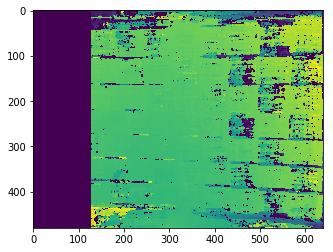

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片

# 预处理
def preprocess(img1, img2):
    # 彩色图->灰度图
    im1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    im2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
 
    # 直方图均衡
    im1 = cv2.equalizeHist(im1)
    im2 = cv2.equalizeHist(im2)
 
    return im1, im2

# 消除畸变
def undistortion(image, camera_matrix, dist_coeff):
    undistortion_image = cv2.undistort(image, camera_matrix, dist_coeff)
 
    return undistortion_image
 
# 获取畸变校正和立体校正的映射变换矩阵、重投影矩阵
# @param：config是一个类，存储着双目标定的参数:config = stereoconfig.stereoCamera()

def getRectifyTransform(height, width, config):
    # 读取内参和外参
    left_K = config.cam_matrix_left
    right_K = config.cam_matrix_right
    left_distortion = config.distortion_l
    right_distortion = config.distortion_r
    R = config.R
    T = config.T
 
    # 计算校正变换
    height = int(height)
    width = int(width)
    R1, R2, P1, P2, Q, roi1, roi2 = cv2.stereoRectify(left_K, left_distortion, right_K, right_distortion, (width, height), R, T, alpha=0)
 
    map1x, map1y = cv2.initUndistortRectifyMap(left_K, left_distortion, R1, P1, (width, height), cv2.CV_16SC2)
    map2x, map2y = cv2.initUndistortRectifyMap(right_K, right_distortion, R2, P2, (width, height), cv2.CV_16SC2)
    print(width,height)
 
    return map1x, map1y, map2x, map2y, Q
 
 
# 畸变校正和立体校正
def rectifyImage(image1, image2, map1x, map1y, map2x, map2y):
    rectifyed_img1 = cv2.remap(image1, map1x, map1y, cv2.INTER_LINEAR)
    rectifyed_img2 = cv2.remap(image2, map2x, map2y, cv2.INTER_LINEAR)
 
    return rectifyed_img1, rectifyed_img2
 
# 立体校正检验----画线
def draw_line(image1, image2):
    # 建立输出图像
    height = max(image1.shape[0], image2.shape[0])
    width = image1.shape[1] + image2.shape[1]
 
    output = np.zeros((height, width), dtype=np.uint8)
    output[0:image1.shape[0], 0:image1.shape[1]] = image1
    output[0:image2.shape[0], image1.shape[1]:] = image2
 
    for k in range(15):
        cv2.line(output, (0, 50 * (k + 1)), (2 * width, 50 * (k + 1)), (0, 255, 0), thickness=2, lineType=cv2.LINE_AA)  # 直线间隔：100
 
    return output

# 视差计算
def disparity_SGBM(left_image, right_image, down_scale=False):
    # SGBM匹配参数设置
    if left_image.ndim == 2:
        img_channels = 1
    else:
        img_channels = 3
    blockSize = 3
    param = {'minDisparity': 0,
             'numDisparities': 128,
             'blockSize': blockSize,
             'P1': 8 * img_channels * blockSize ** 2,
             'P2': 32 * img_channels * blockSize ** 2,
             'disp12MaxDiff': 12,
             'preFilterCap': 1,
             'uniquenessRatio': 5,
             'speckleWindowSize': 1,
             'speckleRange': 100,
             'mode': cv2.STEREO_SGBM_MODE_SGBM_3WAY
             }
 
    # 构建SGBM对象
    sgbm = cv2.StereoSGBM_create(**param)
 
    # 计算视差图
    size = (left_image.shape[1], left_image.shape[0])
    if down_scale == False:
        disparity_left = sgbm.compute(left_image, right_image)
        disparity_right = sgbm.compute(right_image, left_image)
    else:
        left_image_down = cv2.pyrDown(left_image)
        right_image_down = cv2.pyrDown(right_image)
        factor = size[0] / left_image_down.shape[1]
        disparity_left_half = sgbm.compute(left_image_down, right_image_down)
        disparity_right_half = sgbm.compute(right_image_down, left_image_down)
        disparity_left = cv2.resize(disparity_left_half, size, interpolation=cv2.INTER_AREA) 
        disparity_right = cv2.resize(disparity_right_half, size, interpolation=cv2.INTER_AREA)
        disparity_left *= factor 
        disparity_right *= factor
 
    return disparity_left, disparity_right

if __name__ == '__main__':
    imgL = cv2.imread("imagenew/camL/left01.jpg")
    imgR = cv2.imread("imagenew/camR/right01.jpg")
    imgL , imgR = preprocess(imgL ,imgR )
    
    
    height, width = imgL.shape[0:2]
    config = stereoCameral()    # 读取相机内参和外参
    
    # 去畸变
    imgL = undistortion(imgL ,config.cam_matrix_left , config.distortion_l )
    imgR = undistortion(imgR ,config.cam_matrix_right, config.distortion_r )
    
    # 去畸变和几何极线对齐
    map1x, map1y, map2x, map2y, Q = getRectifyTransform(height, width, config)
    iml_rectified, imr_rectified = rectifyImage(imgL, imgR, map1x, map1y, map2x, map2y)
    linepic = draw_line(iml_rectified , imr_rectified)
    # 计算视差
    lookdispL,lookdispR = disparity_SGBM(iml_rectified  , imr_rectified )
    linepic2 = draw_line(lookdispL,lookdispR)
    plt.imshow(lookdispL)
#     plt.imshow(linepic2)   
    points_3d = cv2.reprojectImageTo3D(lookdispL, Q)

[ 1.7204528 -1.1518282 22.659533 ]


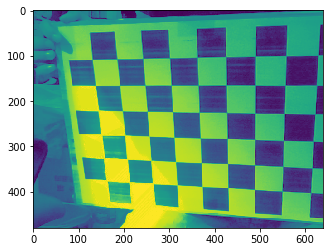

In [50]:
print(points_3d[200][400])
plt.imshow(imgL)

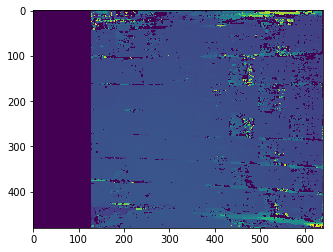

In [55]:
# 用视差获取深度
depth = np.ones_like(lookdispL, dtype=np.uint8)
for i in range(height):
    for j in range(width):
        if lookdispL[i][j]<5: ##噪音
            depth[i][j]=0
        else:
            depth[i][j] = config.cam_matrix_left[0][0]*100/(lookdispL[i][j])
cv2.medianBlur(depth,3)
plt.imshow(depth)


0

In [51]:
points_3d.shape

(480, 640, 3)

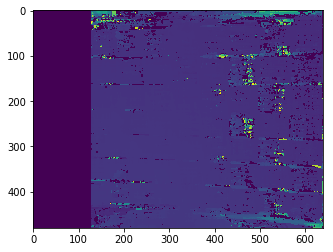

In [23]:
# 也可以直接计算深度值，那么如何到大小呢？
depth = np.ones_like(lookdispL , dtype=np.uint8)
for i in range(height):
    for j in range(width):
        if lookdispL[i][j]<5: ##噪音
            depth[i][j]=0
        else:
            depth[i][j] = np.linalg.norm(points_3d[i][j])
cv2.medianBlur(depth,3)
plt.imshow(depth)

In [52]:
np.linalg.norm(points_3d[1][2])

3764.0728